<h1 align="center">Finite volume methods for Lighthill–Whitham–Richards traffic flow model</h1>

<h2 align="center">Introduction</h2>

The aim of this project is to introduce Lighthill–Whitham–Richards traffic flow model and solve specific examples numerically using finite volume method. We will present assumptions of LWR model and study some specific cases ,from the road' solving them both numerically and if possible analytically. Numerical method that will be used is finite volume method. For one of the real-life examples we will examine consistancy, convergence and stability of chosen method. 

Vehicular traffic is a topic of interest of scientific world since the rational management of car fluxes is a key topic for developing cities. There are many approaches to this complex mathematical problem. We can examine this topic on microscopic level - looking at each vehicle on a road individually. One of the main problems in this approach is rapidly growing number of cars and thereupon computational needs. Macroscopic point of view describes the whole system without looking specifically at each single vehicule, which computationally is way more efficient.

<h2 align="center">LWR model</h2>

Source: [1] chap. Macroscopic Modeling

In macroscopic vehicular modeling we don't look at vehicules individually - we measure some average quantities like density of vehicules on a road at specific time $t$ and specific point $x$ or mean velocity. Usually the motion of cars on a road is one dimentional, so we will be considering this case in which we have only one line road and spatial coordinate $x$ is a scalar independent variable in an appropriate subset of $\mathbb{R}$. 

The main dependent variables introduced to describe the problem are:
- $\rho = \rho(t, x)$ density of cars at time $t$ in the point $x$,
- $u = u(t, x)$ average velocity at time $t$ in the point $x$,
- $q = q(\rho) = \rho u\left(x,t\right)$ the flux, the number of cars passing through an imaginary gate in a given time.  


From the principle of conservation of the vehicles we have 
$$\frac{\partial \rho}{\partial t} + \frac{\partial q\left(\rho\right)}{\partial x} = 0,$$
which means
$$\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}\left(\rho u\right) = 0.$$

Looking at conservation law's equation we can see that the time difference in the amount of cars in the stretch of road between point $x_1$ and $x_2$ is balanced by the difference between incoming flux at $x_1$ and the outgoing flux at $x_2$:

$$\frac{d}{dt} \int_{x_1}^{x_2} \rho\left(t,x\right) dx = \rho\left(t, x_1\right) - \rho\left(t,x_2\right). $$

Lighthill and Whitham and independently Richards proposed the prototype of all fluxes - the parabolic profile by

$$f\left(\rho\right) = u_{\text{max}} \rho \left(1 - \frac{\rho}{\rho_{\text{max}}}\right).$$
Using $f\left(\rho\right) = u\left(\rho\right) = \rho u$ we have
$$u(\rho) = u_{\text{max}} \left(1 - \frac{\rho}{\rho_{\text{max}}}\right).$$ 

The parameter $u_{\text{max}}$ identifies the maximum velocity of cars in a situation of completely free
road $\left(\rho=0\right)$. This model assumes zero flux of vehicales when both $\rho=0$ and $\rho=\rho_{\text{max}}$. Velocity is assumed to be linear function with respect to density. We can see it on the chart below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

import seaborn as sns
import matplotlib as mpl
sns.set_style("darkgrid")
mpl.rcParams['figure.dpi'] = 130

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
# center plots
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [21]:
def f(rho, u_max, rho_max):
    """
    Function calculates values of fundamental diagram for LWR model.
    
    Arguments:
    rho - density of cars,
    u_max - the maximum velocity of cars,
    rho_max - the maximum density of cars.
    """
    f_ = u_max*rho*(1-rho/rho_max)
    return f_

In [22]:
def u(rho, u_max, rho_max):
    """
    Function calculates values of velocity diagram for LWR model.
    
    Arguments:
    rho - density of cars,
    u_max - the maximum velocity of cars,
    rho_max - the maximum density of cars.
    """
    u_ = f(rho, u_max, rho_max)/rho
    return u_

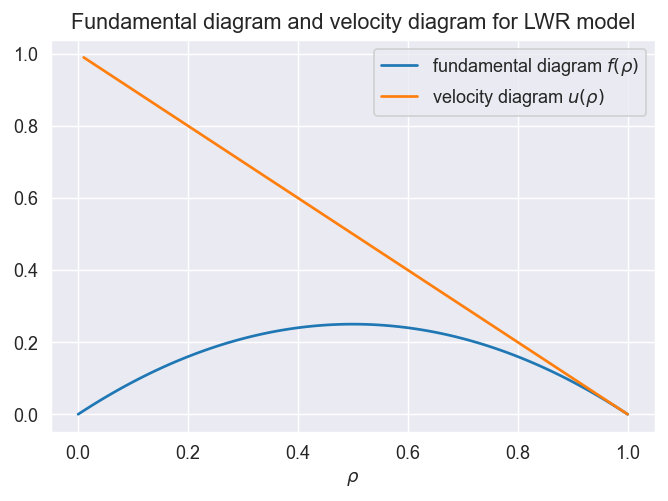

In [23]:
rho_max = 1
u_max = 1
rho = np.linspace(0, rho_max, 100)

plt.plot(rho, f(rho, u_max, rho_max), label=r"fundamental diagram $f\left(\rho\right)$")
plt.plot(rho, u(rho, u_max, rho_max), label=r"velocity diagram $u\left(\rho\right)$")
plt.title("Fundamental diagram and velocity diagram for LWR model")
plt.xlabel(r"$\rho$")
plt.legend()

<h2 align="center">Real-world examples and analytical solution</h2>

<h3 align="center">Red light turns green</h3>

We will consider a case in which the red light at $x=0$ turns green at $t=0$. It means that we have

$$\begin{cases} \rho_t + q_x = 0 \\ \rho\left(x,0\right) = \begin{cases} \rho_{\text{max}},~x < 0 \\ 0,~x>0. \end{cases} \end{cases}$$

Using $q=\rho u$ for flux and $u(\rho) = u_{\text{max}} \left(1 - \frac{\rho}{\rho_{\text{max}}}\right)$ from LWR model we obtain

$$\begin{cases} \rho_t + u_{\text{max}} \rho_x \left(1-2 \frac{\rho}{\rho_{\text{max}}}\right) = 0 \\ \rho\left(x,0\right) = \begin{cases} \rho_{\text{max}},~x<0 \\ 0,~x>0.\end{cases} \end{cases}$$

To solve this problem we will use the method of characteristics. We begin with

$$\begin{cases} x=X\left(t\right) \\
P \left(X\left(t\right), t\right) = P \left(t\right) \end{cases}$$

and using initial condition $X\left(0\right) = \xi$ we get

$$P\left(t\right) = \begin{cases} \rho_{\text{max}},~\xi<0 \\ 
0,~\xi>0 \end{cases}$$

and 

$$X\left(t\right) = \begin{cases} -u_{\text{max}} t + \xi,~\xi<0 \\ 
u_{\text{max}} t + \xi,~\xi>0. \end{cases}$$

In [24]:
# wykres charakterystyk hehe - mamy void

def red_green_light_X(u_max, t, ksi):
    """
    ksi - lista z ksi
    """
    if ksi<0:    
        x = -u_max*t+ksi
    else:
        x = u_max*t+ksi
        
    return x

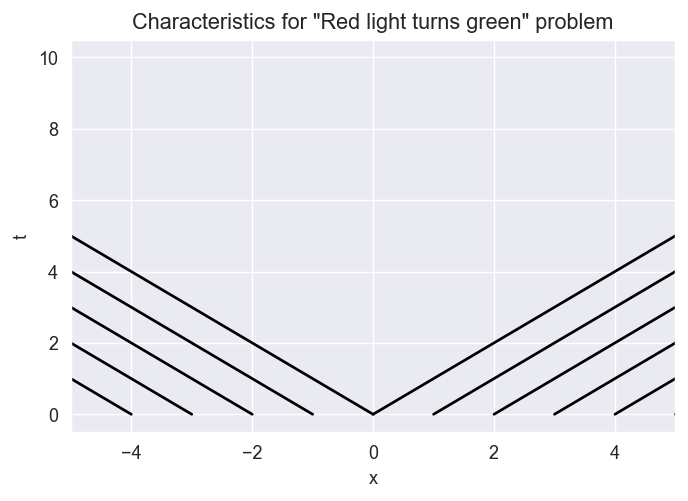

In [25]:
u_max = 1
Ksi = np.arange(-5,6)
t = np.linspace(0, 10, 100)

# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# sns.set_style("ticks")
# ax.spines['left'].set_position(('data', 0))
# ax.spines['right'].set_position(('data', 0))
# ax.spines['bottom'].set_position(('data', 0))
# ax.spines['top'].set_position(('data', 0))

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

for i in range(len(Ksi)):
    X = red_green_light_X(u_max, t, Ksi[i])
    plt.plot(X, t, 'black')
    
plt.plot(-u_max*t, t, 'black') # add ksi=0 on the other side
plt.xlim([Ksi[0], Ksi[-1]])
plt.title('Characteristics for "Red light turns green" problem')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

We have a void between out characteristics - a region with no solution. We will fill it with the fan. Having

$$c\left(\rho\right) = u_{\text{max}} \left(1-2\frac{\rho}{\rho_{\text{max}}}\right)$$

and starting point $x_0=0$, $t_0=0$, we obtain

$$c^{-1}\left(\frac{x}{t}\right) = \tilde{\rho} \left(x,t\right) = \frac{\rho_{\text{max}}\left(1-\frac{x}{t u_{\text{max}}}\right)}{2}.$$

<h3 align="center">Traffic jam</h3>

We can also consider a case when cars approach a traffic jam due to for example construction, an accident or a red light. At the point of the obstacle $x=0$ the density of cars will be maximum - $\rho_{\text{max}}$ and upstream of it the density will be lower, so $\rho_l < \rho_{\text{max}}$. Using LWR model we have

$$\begin{cases} \rho_t + u_{\text{max}} \rho_x \left(1-2 \frac{\rho}{\rho_{\text{max}}}\right) = 0 \\ \rho\left(x,0\right) = \begin{cases} \rho_{l},~x<0 \\ \rho_{\text{max}},~x>0.\end{cases} \end{cases}$$

Finally, also using the method of characteristics we obtain
$$P\left(t\right) = \begin{cases} \rho_l,~\xi<0 \\ 
\rho_{\text{max}},~\xi>0\end{cases}$$
and 
$$X\left(t\right) = \begin{cases} u_{\text{max}} t \left(1-2 \frac{\rho_l}{\rho_{\text{max}}}\right)+\xi,~\xi<0 \\ 
- u_{\text{max}} t +\xi,~\xi>0. \end{cases}$$

In [27]:
def traffic_jam_X(u_max, t, rho_max, rho_l, ksi):
    if ksi<0:
        x = u_max*t*(1-2*rho_l/rho_max) + ksi
    else:
        x = -u_max*t + ksi
        
    return x

In [84]:
def traffic_jam_X_shock(u_max, t, rho_max, rho_l, ksi):
    if ksi<0:
        x = u_max*t*(1-2*rho_l/rho_max) + ksi
        if x >= (u_max*rho_l**2-u_max*rho_l*rho_max)/(rho_max*(rho_max-rho_l))*t:
            x=np.nan
    else:
        x = -u_max*t + ksi
        if x <= (u_max*rho_l**2-u_max*rho_l*rho_max)/(rho_max*(rho_max-rho_l))*t:
            x = np.nan
        
    return x

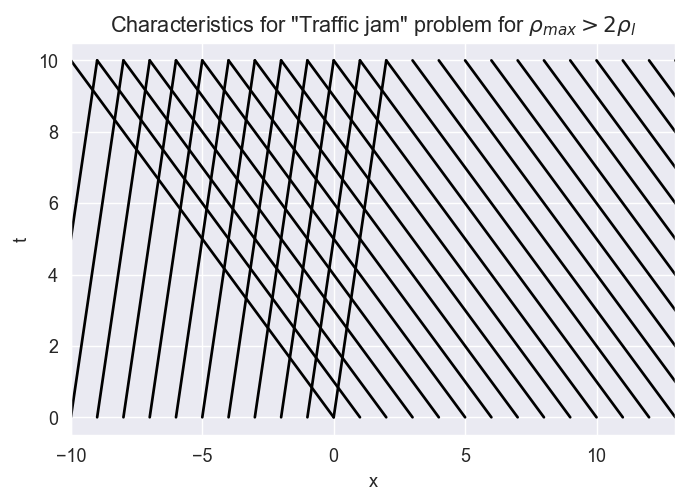

In [28]:
u_max = 1
rho_max = 1
rho_l = 0.4
Ksi = np.arange(-15,25)
t = np.linspace(0, 10, 100)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

for i in range(len(Ksi)):
    X = traffic_jam_X(u_max, t, rho_max, rho_l, Ksi[i])
    plt.plot(X, t, 'black')

plt.plot(u_max*t*(1-2*rho_l/rho_max), t, 'black') # add ksi=0 on the other side
plt.xlim([-10, 13])
plt.title(r'Characteristics for "Traffic jam" problem for $\rho_{max} > 2\rho_{l}$')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Our characteristics intersect. It means that we have to find a shock wave - a propagation of a discontinuity along the curve $s\left(t\right)$ satisfying the Rankine-Hugoniot’s condition.

We have

$$q'\left(\rho\right) = c\left(\rho\right) = u_{\text{max}}\left(1-2\frac{\rho}{\rho_{\text{max}}}\right),$$
so
$$q\left(\rho\right) = u_{\text{max}}\rho - u_{\text{max}}\frac{\rho^{2}}{\rho_{\text{max}}}$$
and
$$\rho_{+} = \rho_{\text{max}},~rho_{-} = \rho_l.$$
Finally having
$$s'\left(t\right) = \frac{[q]}{[u]} = \frac{u_{\text{max}}\rho_{l}^{2} - u_{\text{max}} \rho_l \rho_{\text{max}}}{\rho_{\text{max}}\left(\rho_{\text{max}} - \rho_l \right)},~s\left(0\right)=0$$
we obtain 
$$s\left(t\right) = \frac{u_{\text{max}}\rho_{l}^{2} - u_{\text{max}} \rho_l \rho_{\text{max}}}{\rho_{\text{max}}\left(\rho_{\text{max}} - \rho_l \right)} t.$$

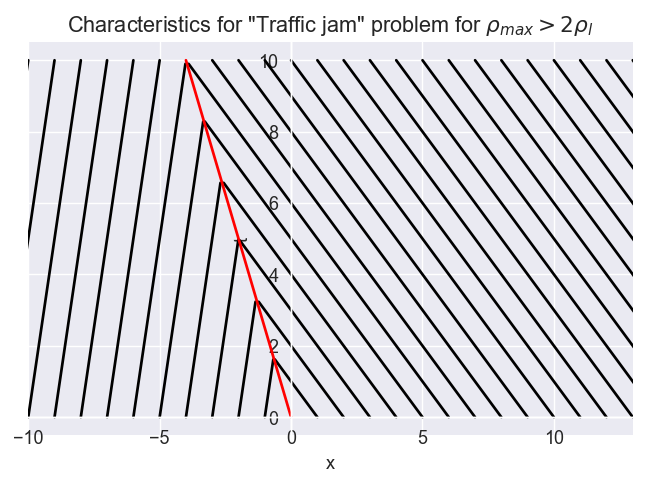

In [85]:
u_max = 1
rho_max = 1
rho_l = 0.4
Ksi = np.arange(-15,25)
t = np.linspace(0, 10, 100)

fig, ax = plt.subplots(1, 1)
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_position(('data', 0))
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
X = []
for i in range(len(Ksi)):
    for j in t:
        X.append(traffic_jam_X_shock(u_max, j, rho_max, rho_l, Ksi[i]))
    plt.plot(X, t, 'black')
    X = []

plt.plot((u_max*rho_l**2-u_max*rho_l*rho_max)/(rho_max*(rho_max-rho_l))*t, t, 'red')
plt.xlim([-10, 13])
plt.title(r'Characteristics for "Traffic jam" problem for $\rho_{max} > 2\rho_{l}$')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

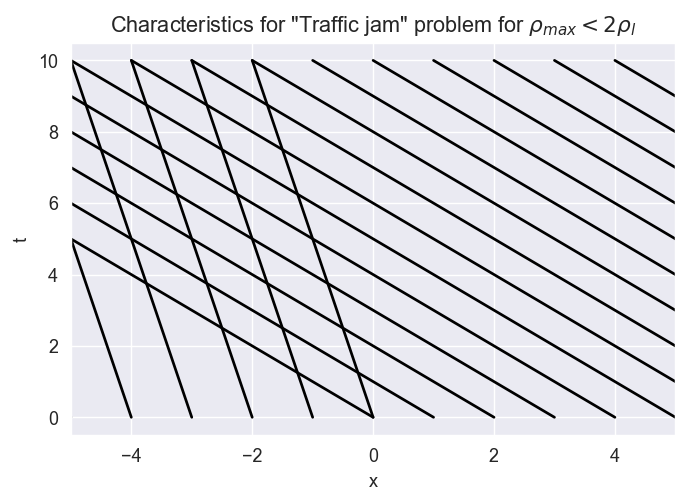

In [30]:
u_max = 1
rho_max = 1
rho_l = 0.6
Ksi = np.arange(-5,15)
t = np.linspace(0, 10, 100)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

for i in range(len(Ksi)):
    X = traffic_jam_X(u_max, t, rho_max, rho_l, Ksi[i])
    plt.plot(X, t, 'black')

plt.plot(u_max*t*(1-2*rho_l/rho_max), t, 'black') # add ksi=0 on the other side
plt.xlim([Ksi[0], 5])
plt.title(r'Characteristics for "Traffic jam" problem for $\rho_{max} < 2\rho_{l}$')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

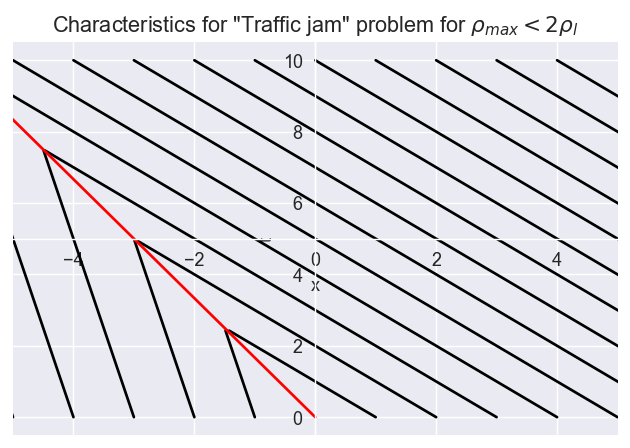

In [88]:
u_max = 1
rho_max = 1
rho_l = 0.6
Ksi = np.arange(-5,15)
t = np.linspace(0, 10, 100)

fig, ax = plt.subplots(1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

X = []
for i in range(len(Ksi)):
    for j in t:
        X.append(traffic_jam_X_shock(u_max, j, rho_max, rho_l, Ksi[i]))
    plt.plot(X, t, 'black')
    X = []

plt.plot((u_max*rho_l**2-u_max*rho_l*rho_max)/(rho_max*(rho_max-rho_l))*t, t, 'red')
plt.xlim([Ksi[0], 5])
plt.title(r'Characteristics for "Traffic jam" problem for $\rho_{max} < 2\rho_{l}$')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Our characteristics intersect, so we have to fit a shock wave. 

We have 
$$q'\left(\rho\right) = c\left(\rho\right) = u_{\text{max}} \left(1-2\frac{\rho}{\rho_{\text{max}}}\right),$$
so 
$$q\left(\rho\right) = u_{\text{max}} \rho - u_{\text{max}} \frac{\rho^{2}}{\rho_{\text{max}}}.$$

Using $\rho_{+} = \rho_{\text{max}}$ and $\rho_{-} = \rho_l$ we obtain
$$s'\left(t\right) = \frac{u_{\text{max}} \rho_{l}^{2} - u_{\text{max}} \rho_l \rho_{\text{max}}}{\rho_{\text{max}}\left(\rho_{\text{max}} - \rho_l\right)} $$
and finally having $s\left(0\right) = 0$
$$s\left(t\right) = \frac{u_{\text{max}} \rho_{l}^{2} - u_{\text{max}} \rho_l \rho_{\text{max}}}{\rho_{\text{max}}\left(\rho_{\text{max}} - \rho_l\right)} t.$$

<h3 align="center">Sudden braking of a car</h3>

Now we will model a situation when a car on a road suddenly brakes and immediately starts driving again. This can happen with an animal or any other sudden creature on a road. To describe it mathematically we will use an initial condition in a form of gaussian:

$$\begin{cases} \rho_t + u_{\text{max}} \rho_x\left(1-2\frac{\rho}{\rho_{\text{max}}}\right) = 0 \\
\rho\left(x,0\right) = \frac{1}{\sqrt{4 \pi \sigma}} e^{-\frac{\left(x-x_0\right)^{2}}{4 \sigma^{2}}}, \end{cases}$$
where $x_0$ - the centre of $\rho_0$ wave.

As in the previous examples we are using characteristics method and we obtain
$$P\left(t\right) = \frac{1}{\sqrt{4 \pi \sigma^{2}}} e^{-\frac{\left( \xi - x_0\right)^{2}}{2\sigma^{2}}}$$
and 
$$X\left(t\right) = u_{\text{max}} t \left(1-\frac{e^{-\frac{\left(\xi - x_0\right)^{2}}{4\sigma^{2}}}}{\sqrt{\pi\sigma^{2}} \rho_{\text{max}}}\right) + \xi.$$

Since the above equation is complex it is hard to derive the formula for $\xi$ analyticaly. Later on we will only analyse the numerical solution to this problem.

<h2 align="center">Finite volume method and its application for LWR model</h2>

We will consider general conservation law equation (possibly nonlinear) in the form $$\rho_t(x, t) + f(\rho(x, t))_x = 0$$

We introduce a space-time cell:
$$[x_{j - 1/2}, x_{j +  1/2}] \times [t_n, t_{n+1}],$$

where $x_j = jk,~x_{j \pm 1/2} = x_j \pm k/2,~t_n = nh$.
If we now consider the cell average:
$$\rho_j^n := \frac{1}{k} \int\limits_{x_{j-1/2}}^{x_{j+1/2}} \rho(x, t_n) dx,$$
and the so-called numerical flux:
$$F_{j+1/2}^n := \frac{1}{h} \int\limits_{t_n}^{t_{n+1}} f(\rho(x_{j+1/2}, t))dt,$$
we obtain 
$$\rho_j^{n+1} = \rho_j^n - \frac{h}{k}\left(F_{j+1/2}^n - F_{j-1/2}^n\right).$$

This is known as finite volume method. Now we are interested in finding good approximation of numerical flux $F$. Our approach is to use the Lax-Friedrich scheme:
$$\rho_j^{n+1} = \frac{1}{2}\left(\rho_{j+1}^n + \rho_{j-1}^n\right) + \frac{h}{2k}\left(f(\rho_{j-1}^n) - f(\rho_{j+1}^n)\right)$$
with the numerical flux
$$F_{j+1/2}^{n} = \frac{k}{2h}\left(\rho_{j}^n - \rho_{j+1}^n\right) + \frac{1}{2}\left(f(\rho_{j}^n) + f(\rho_{j+1}^n)\right).$$

In [2]:
def FVM(method, problem, u_max=1, rho_max=1, rho_l=0.8, sigma=1, a=-1.5, b=1.5, T=1, k=0.01, h=0.001):
    """
    Implementation of the finite volume method for the vehicular traffic model.
    
    Arguments:
    method - method of approximation of the numerical flux, "Lax-Friedrich"
    problem - considered problem, "red_green_light" or "traffic_jam"
    u_max - maximum velocity
    rho_max - maximum density
    rho_l - parameter of the "traffic jam" problem
    sigma - parameter of the "braking" problem
    (a, b) - space range
    (0, T) - time range
    k - spatial step
    h - time step    
    """
    
    xs = np.arange(a, b+k, k)
    ts = np.arange(0, T+h, h)
    
    rho = np.zeros((len(xs), len(ts)))
    
    if problem == "red_green_light":
        rho[:int(len(xs)/2),0] = rho_max # initial condition
        rho[0,:] = rho_max # boundary condition for x=a
        rho[-1,:] = 0 # boundary condition for x=b
    elif problem == "traffic_jam":
        rho[xs < 0,0] = rho_l # initial condition
        rho[xs > 0,0] = rho_max
        rho[0,:] = rho_l # boundary condition for x=a
        rho[-1,:] = rho_max # boundary condition for x=b
    elif problem == "braking":
        rho[:,0] = 1/np.sqrt(2*np.pi*sigma)*np.exp(-xs**2/(2*sigma**2)) # initial condition
    else:
        print("Choose one of implemented problems.")
     
    for n in range(len(ts)-1):      
        if method == 'Lax-Friedrich': # Lax-Friedrich flux
            F_p = k/(2*h)*(rho[1:-1,n] - rho[2:,n]) + 1/2*(u_max*rho[1:-1,n]*(1 - rho[1:-1,n]/rho_max) + u_max*rho[2:,n]*(1 - rho[2:,n]/rho_max))
            F_m = k/(2*h)*(rho[0:-2,n] - rho[1:-1,n]) + 1/2*(u_max*rho[:-2,n]*(1 - rho[0:-2,n]/rho_max) + u_max*rho[1:-1,n]*(1 - rho[1:-1,n]/rho_max))
        else:
            print("Choose one of implemented methods.")
        
        rho[1:-1,n+1] = rho[1:-1,n] - h/k*(F_p - F_m)
        
#         explicit formula:
#         rho[1:-1, n+1] = 1/2*(rho[2:,n] + rho[0:-2,n]) + h/(2*k)*(u_max*rho[0:-2,n]*(1 - rho[0:-2,n]/rho_max) - u_max*rho[2:,n]*(1 - rho[2:,n]/rho_max))
         
    return rho, xs, ts

In [3]:
def theoretical_solution(problem, xs, ts, u_max=1, rho_max=1, rho_l=0.8):
    """
    Theoretical solution to the vehicular traffic problems.
    
    Arguments:
    problem - considered problem, "red_green_light" or "traffic_jam"
    xs - space points
    ts - time points
    u_max - maximum velocity
    rho_max - maximum density
    rho_l - parameter of the "traffic jam" problem
    """
    
    rho_theoretical = np.zeros((len(xs), len(ts)))
    
    if problem == "red_green_light":
        rho_theoretical[xs < 0,0] = rho_max  # initial condition

        for i, t in enumerate(ts[1:]):
            rho_theoretical[:,i+1] = rho_max/2*(1 - xs/(t*u_max)) # solution in the void
            rho_theoretical[xs < -u_max*t,i+1] = rho_max
            rho_theoretical[xs > u_max*t,i+1] = 0
    
    elif problem == "traffic_jam":
        rho_theoretical[xs < 0,0] = rho_l
        rho_theoretical[xs >= 0,0] = rho_max
        
        for i, t in enumerate(ts[1:]):
            s_t = (u_max*rho_l**2 -  u_max*rho_l*rho_max)/(rho_max*(rho_max - rho_l))*t
            for j, x in enumerate(xs):
                if x < s_t:
                    rho_theoretical[j,i+1] = rho_l
                else:
                    rho_theoretical[j,i+1] = rho_max
    
    elif problem == "braking":
        rho_theoretical[:,:] = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-xs**2)
    else:
        print("Choose one of implemented problems.")
    
    return rho_theoretical

In [4]:
def animated_plot(rho, xs, ts, filename, tit):
    """
    Function creating animation of the solution to one of vehicualr traffic problems.
    
    Arguments:
    rho - solution
    xs - spatial vector
    ts - time vector
    filename - name of the generated file
    tit - title of the plot
    """

    fig, ax = plt.subplots()
    line, = ax.plot([])
    title = ax.text(0, 1.15, f"{tit} at t=0.00", horizontalalignment='center')

    ax.set_xlim(xs[0]-(xs[1] - xs[0]), xs[-1]+(xs[1] - xs[0]))
    ax.set_ylim(0-0.1, 1+0.1)
    ax.set_xlabel("x")
    ax.set_ylabel(r"$\rho$")

    def animate(frame_num):
        rhos = rho[:,frame_num]
        line.set_data((xs, rhos))
        title.set_text("{} at t={:.2f}".format(tit, ts[frame_num]))
        return line

    anim = FuncAnimation(fig, animate, frames=len(ts), interval=50)
    writer = PillowWriter(fps=50)
    anim.save(f"animations/{filename}.gif", writer=writer)
    plt.close()

<h3 align="center">Red light turns green - numerical solution</h3>

We will now present the numerical solution to the first problem. We will consider the following set of parameters: $u_{\text{max}} = 1, \rho_{\text{max}} = 1$, spatial step $k=0.01$ and time step $h=0.001$.

In [17]:
rho, xs, ts = FVM(method="Lax-Friedrich", problem="red_green_light")
rho_theoretical = theoretical_solution(problem="red_green_light", xs=xs, ts=ts)
animated_plot(rho, xs, ts, "red_green_light_01_001", "Numerical solution")
animated_plot(rho_theoretical, xs, ts, "red_green_light_theoretical", "Theoretical solution")

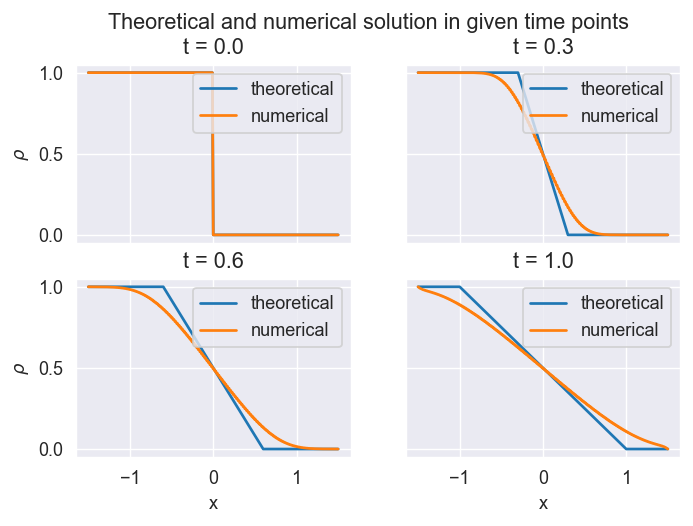

In [24]:
time_points = [0, 300, 600, 1000]

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(xs, rho_theoretical[:,time_points[0]], label="theoretical")
axs[0, 0].plot(xs, rho[:,time_points[0]], label="numerical")
axs[0, 0].set_title(f't = {ts[time_points[0]]}')
axs[0, 0].legend()
axs[0, 1].plot(xs, rho_theoretical[:,time_points[1]], label="theoretical")
axs[0, 1].plot(xs, rho[:,time_points[1]], label="numerical")
axs[0, 1].set_title(f't = {ts[time_points[1]]}')
axs[0, 1].legend()
axs[1, 0].plot(xs, rho_theoretical[:,time_points[2]], label="theoretical")
axs[1, 0].plot(xs, rho[:,time_points[2]], label="numerical")
axs[1, 0].set_title(f't = {ts[time_points[2]]}')
axs[1, 0].legend()
axs[1, 1].plot(xs, rho_theoretical[:,time_points[3]], label="theoretical")
axs[1, 1].plot(xs, rho[:,time_points[3]], label="numerical")
axs[1, 1].set_title(f't = {ts[time_points[3]]}')
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='x', ylabel=r'$\rho$')

for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle("Theoretical and numerical solution in given time points")  
plt.show()

<img src="animations/red_green_light_01_001.gif" width="600" align="center">
<img src="animations/red_green_light_theoretical.gif" width="600" align="center">

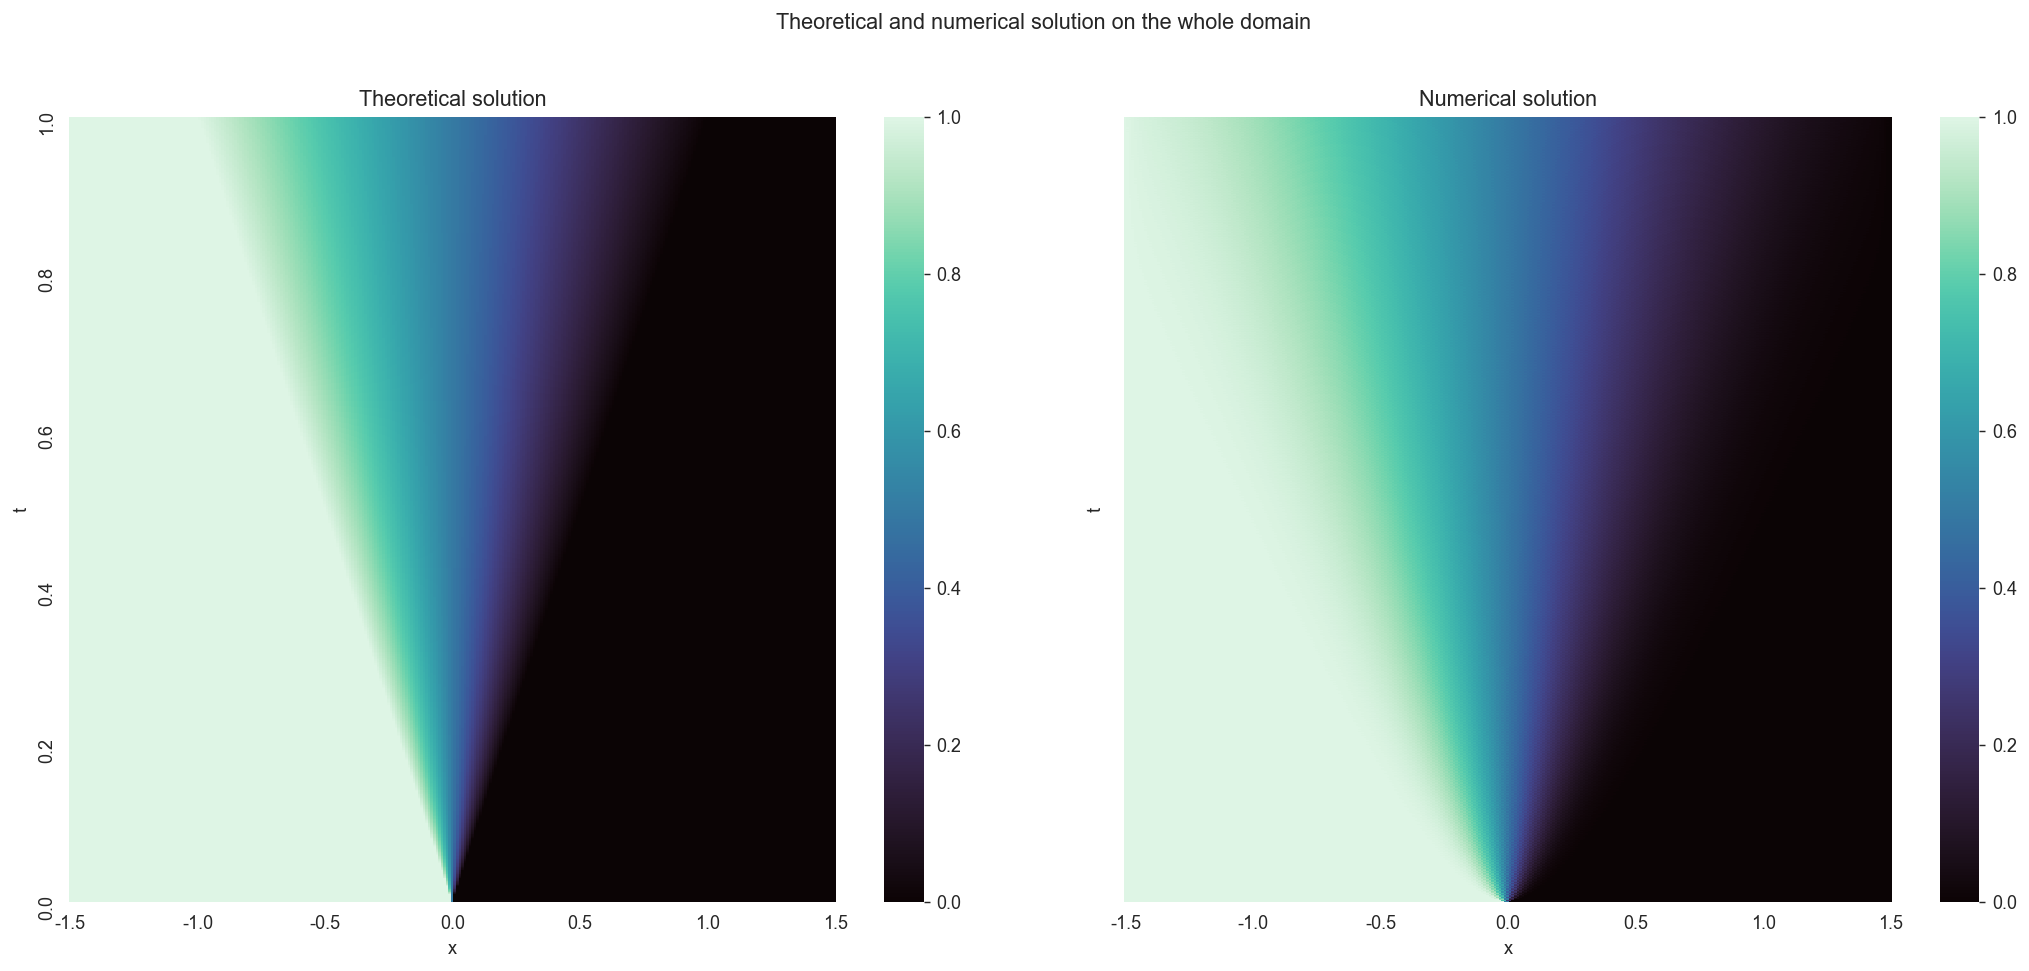

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
fig.subplots_adjust(wspace=0.1)

sns.heatmap(pd.DataFrame(rho_theoretical.T,  columns = np.round(xs,1), index = ts), cmap='mako', xticklabels=50, yticklabels=200, ax=ax1, cbar=True)
sns.heatmap(pd.DataFrame(rho.T, columns = np.round(xs,1), index = ts), cmap='mako', xticklabels=50, yticklabels=200, ax=ax2, cbar=True)

ax1.invert_yaxis()
ax1.set_title("Theoretical solution")
ax1.set(xlabel="x", ylabel="t")
ax2.invert_yaxis()
ax2.set_title("Numerical solution")
ax2.set(xlabel="x", ylabel="t")
ax2.yaxis.set_ticklabels([])

fig.suptitle("Theoretical and numerical solution on the whole domain")  
fig.subplots_adjust(wspace=0.1)
plt.show()

In [27]:
error = abs(rho - rho_theoretical)

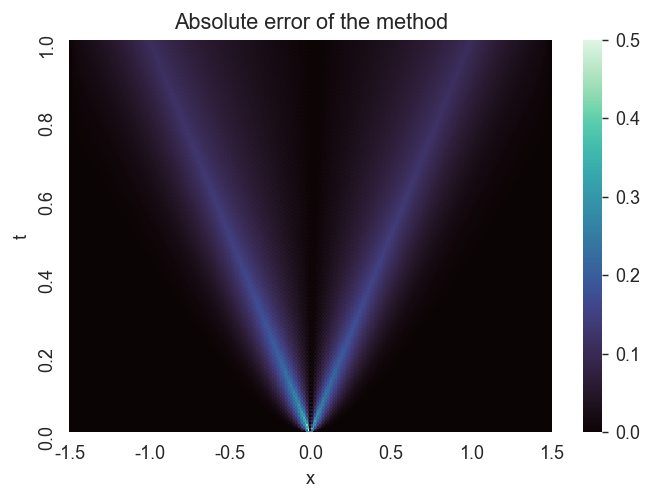

In [28]:
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(error.T,  columns = np.round(xs,1), index = ts), cmap='mako', xticklabels=50, yticklabels=200, ax=ax, cbar=True)

ax.invert_yaxis()
ax.set_title("Absolute error of the method")
ax.set(xlabel="x", ylabel="t")
plt.show()

<h3 align="center">Traffic jam - numerical solution</h3>

We will now present the numerical solution to the second problem. We will consider the following set of parameters: $u_{\text{max}} = 1, \rho_{\text{max}} = 1$, spatial step $k=0.01$ and time step $h=0.001$.

In [5]:
rho, xs, ts = FVM(method="Lax-Friedrich", problem="traffic_jam")
rho_theoretical = theoretical_solution(problem="traffic_jam", xs=xs, ts=ts)
animated_plot(rho, xs, ts, "traffic_jam_01_001", "Numerical solution")
animated_plot(rho_theoretical, xs, ts, "traffic_jam_theoretical", "Theoretical solution")

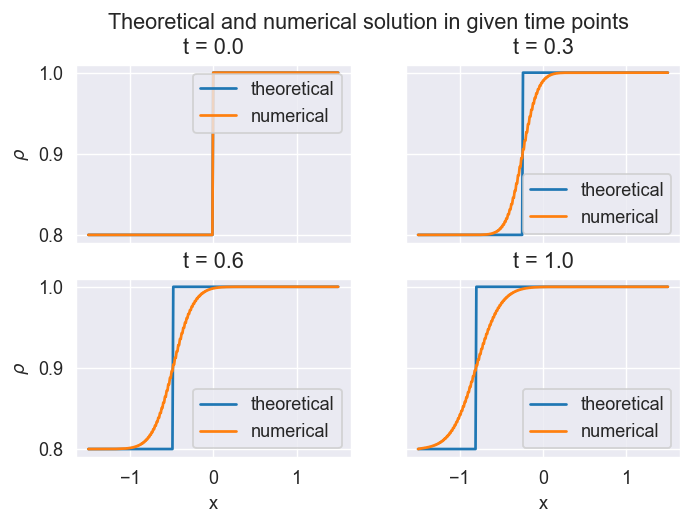

In [14]:
time_points = [0, 300, 600, 1000]

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(xs, rho_theoretical[:,time_points[0]], label="theoretical")
axs[0, 0].plot(xs, rho[:,time_points[0]], label="numerical")
axs[0, 0].set_title(f't = {ts[time_points[0]]}')
axs[0, 0].legend()
axs[0, 1].plot(xs, rho_theoretical[:,time_points[1]], label="theoretical")
axs[0, 1].plot(xs, rho[:,time_points[1]], label="numerical")
axs[0, 1].set_title(f't = {ts[time_points[1]]}')
axs[0, 1].legend()
axs[1, 0].plot(xs, rho_theoretical[:,time_points[2]], label="theoretical")
axs[1, 0].plot(xs, rho[:,time_points[2]], label="numerical")
axs[1, 0].set_title(f't = {ts[time_points[2]]}')
axs[1, 0].legend()
axs[1, 1].plot(xs, rho_theoretical[:,time_points[3]], label="theoretical")
axs[1, 1].plot(xs, rho[:,time_points[3]], label="numerical")
axs[1, 1].set_title(f't = {ts[time_points[3]]}')
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='x', ylabel=r'$\rho$')

for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle("Theoretical and numerical solution in given time points")  
plt.show()

<img src="animations/traffic_jam_01_001.gif" width="600" align="center">
<img src="animations/traffic_jam_theoretical.gif" width="600" align="center">

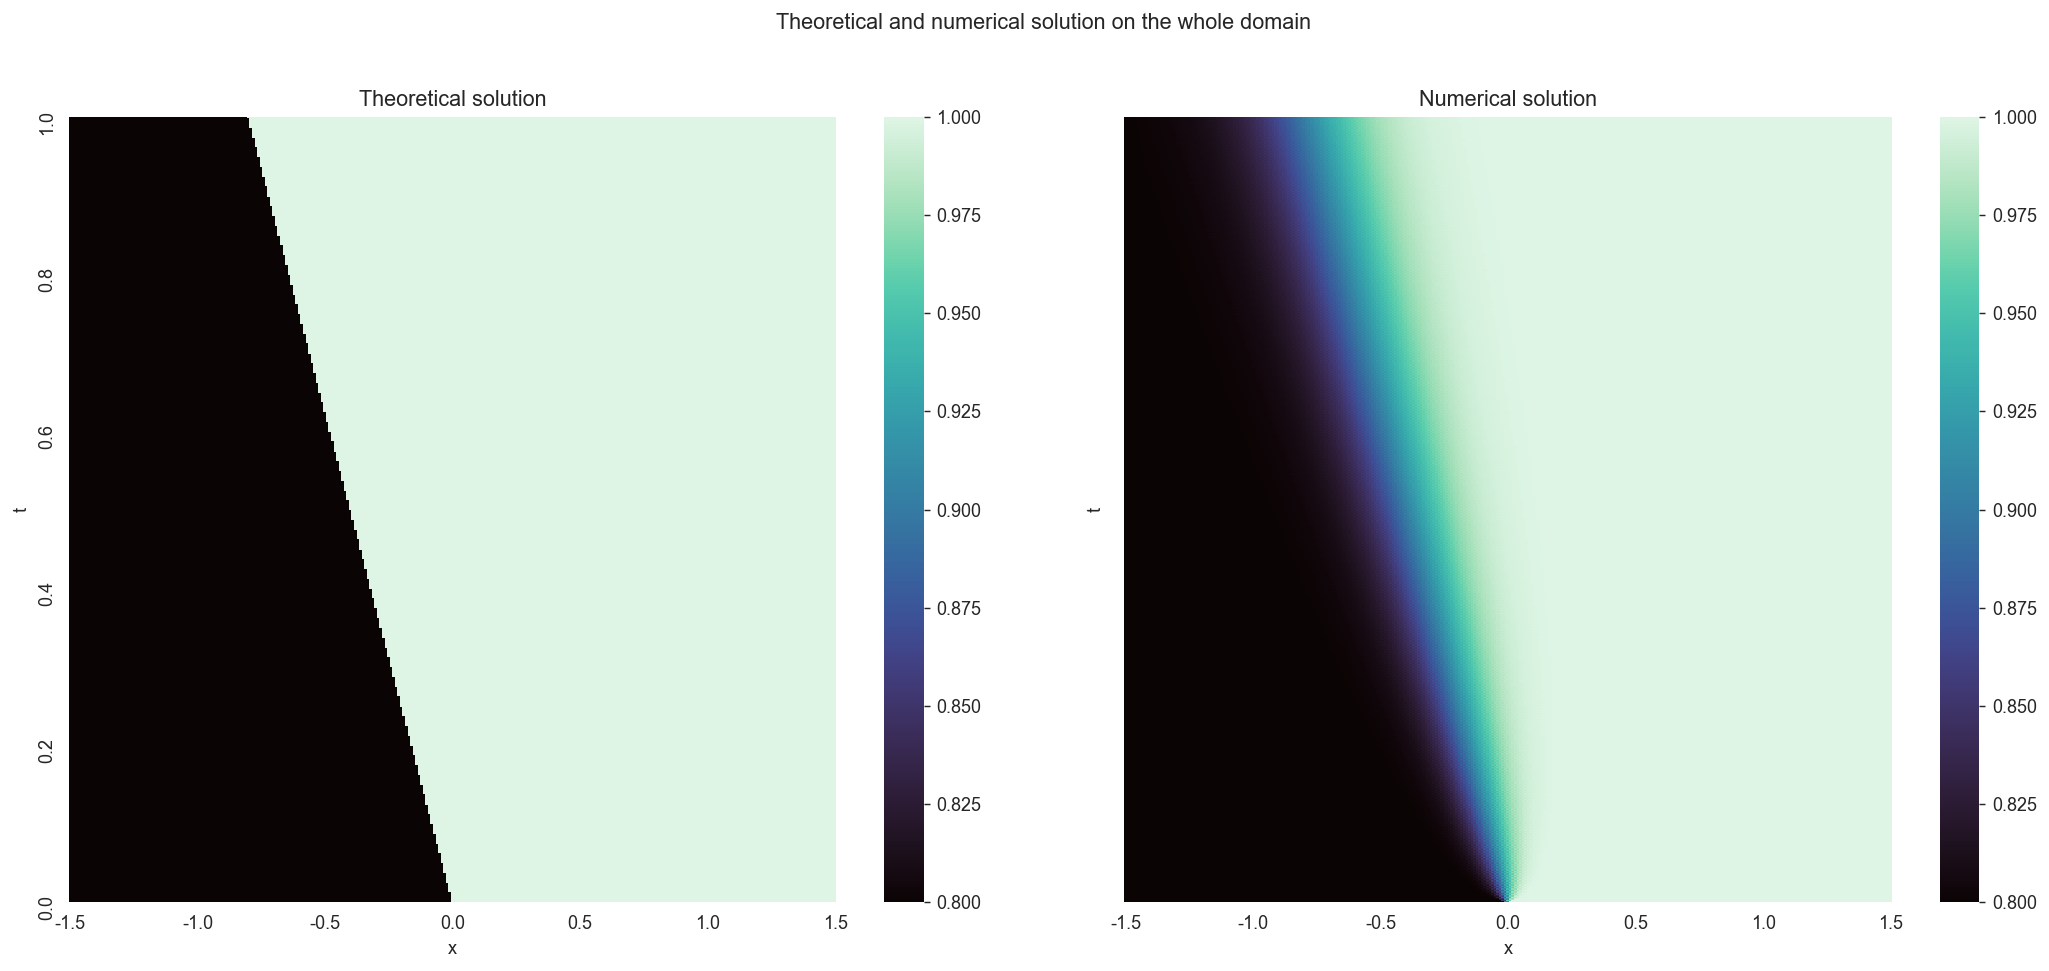

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
fig.subplots_adjust(wspace=0.1)

sns.heatmap(pd.DataFrame(rho_theoretical.T,  columns = np.round(xs,1), index = ts), cmap='mako', xticklabels=50, yticklabels=200, ax=ax1, cbar=True)
sns.heatmap(pd.DataFrame(rho.T, columns = np.round(xs,1), index = ts), cmap='mako', xticklabels=50, yticklabels=200, ax=ax2, cbar=True)

ax1.invert_yaxis()
ax1.set_title("Theoretical solution")
ax1.set(xlabel="x", ylabel="t")
ax2.invert_yaxis()
ax2.set_title("Numerical solution")
ax2.set(xlabel="x", ylabel="t")
ax2.yaxis.set_ticklabels([])

fig.suptitle("Theoretical and numerical solution on the whole domain")  
fig.subplots_adjust(wspace=0.1)
plt.show()

In [16]:
error = abs(rho - rho_theoretical)

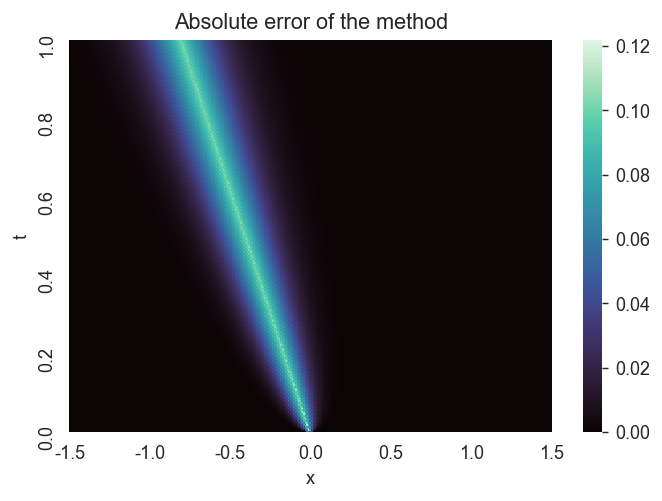

In [17]:
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(error.T,  columns = np.round(xs,1), index = ts), cmap='mako', xticklabels=50, yticklabels=200, ax=ax, cbar=True)

ax.invert_yaxis()
ax.set_title("Absolute error of the method")
ax.set(xlabel="x", ylabel="t")
plt.show()

<h3 align="center">Sudden braking of a car - numerical solution</h3>

We will now present the numerical solution to the third problem. We will consider the following set of parameters: $u_{\text{max}} = 1, \rho_{\text{max}} = 1, \sigma=1$, spatial step $k=0.01$ and time step $h=0.001$.

In [ ]:
rho, xs, ts = FVM(method="Lax-Friedrich", problem="braking", sigma=0.1, k=0.01, h=0.001, a=-3, b=3)
animated_plot(rho, xs, ts, "braking_01_001", "Numerical solution")
# rho_theoretical = theoretical_solution(problem="traffic_jam", xs=xs, ts=ts)

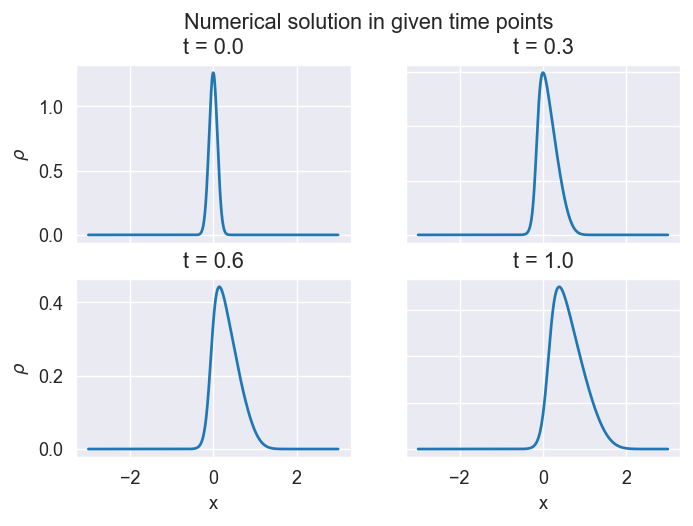

In [64]:
time_points = [0, 300, 600, 1000]

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(xs, rho[:,time_points[0]])
axs[0, 0].set_title(f't = {ts[time_points[0]]}')
axs[0, 1].plot(xs, rho[:,time_points[1]])
axs[0, 1].set_title(f't = {ts[time_points[1]]}')
axs[1, 0].plot(xs, rho[:,time_points[2]])
axs[1, 0].set_title(f't = {ts[time_points[2]]}')
axs[1, 1].plot(xs, rho[:,time_points[3]])
axs[1, 1].set_title(f't = {ts[time_points[3]]}')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel=r'$\rho$')

for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle("Numerical solution in given time points")  
plt.show()

<img src="animations/braking_01_001.gif" width="600" align="center">

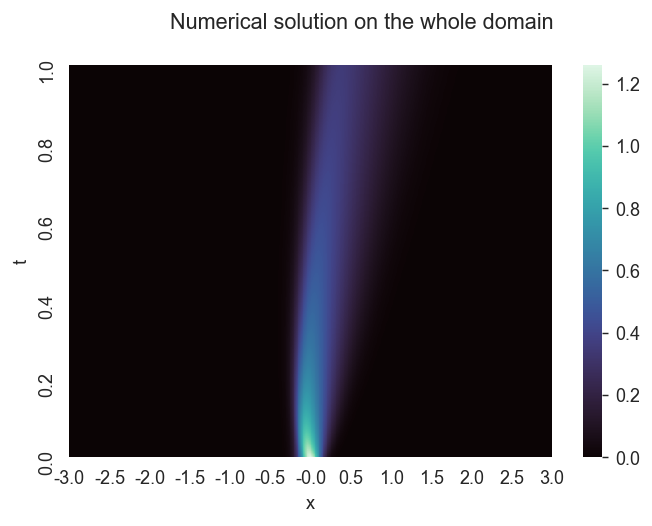

In [65]:
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(rho.T, columns = np.round(xs,1), index = ts), cmap='mako', xticklabels=50, yticklabels=200, ax=ax, cbar=True)

ax.invert_yaxis()
ax.set(xlabel="x", ylabel="t")

fig.suptitle("Numerical solution on the whole domain")  
plt.show()

<h3 align="center">Consistency</h3>

<h3 align="center">Convergence</h3>

In this section we will nummericaly analyse the convergence of the finite volume method based on the Lax-Friedrich scheme. We will simulate the *red light turns green* problem on a fixed domain $(x, t) \in [-1.5, 1.5] \times [0, 1]$ with fixed spatial step $k = 0.01$. We will analyse the maximum error at $t = T$ of the method

$$\epsilon = \max_i |\rho(x_i,T) - \rho_i^N|$$ 

for each value of the time step $h = 2^{-j}, j = 5, 6, \ldots, 20$. As usualy, we will assume that $u_{\text{max}} = 1, \rho_{\text{max}} = 1$.

In [4]:
def convergence_FVM(dts, method="Lax-Friedrich", problem="red_green_light", u_max=1, rho_max=1, a=-1.5, b=1.5, T=1, k=0.01):
    """
    Function returning estimated order of convergence of the finite volume method based on the "red light turning green" problem.
    
    Arguments:
    dts - vector of time steps h
    method - method of approximation of the numerical flux, "Lax-Friedrich" or "simple"
    problem - considered problem, "red_green_light"
    u_max - maximum velocity
    rho_max - maximum density
    (a, b) - space range
    (0, T) - time range
    k - spatial step
    """
    
    dts = sorted(dts)
    errs = []
    ps = []
    
    for h in dts:
        rho_FVM, xs, ts = FVM(method, problem, u_max, rho_max, a, b, T, k, h)
        rho_exact = theoretical_solution(problem, xs, ts, u_max, rho_max)
        errs.append(max(abs(rho_exact[:,-1] - rho_FVM[:,-1])))
    
    for i in range(len(errs)-1):
        fit = np.polyfit(np.log(dts[i:i+2]), np.log(errs[i:i+2]), 1)     
        p = fit[0]  
        ps.append(p)
    
    plt.loglog(dts, errs, label=f'k={k}')
    plt.title(f'Error of the FVM method in the log-log scale')
    plt.xlabel(r'$\Delta t$')
    plt.ylabel(r'$\epsilon$')
    plt.show()
    
    return ps, errs

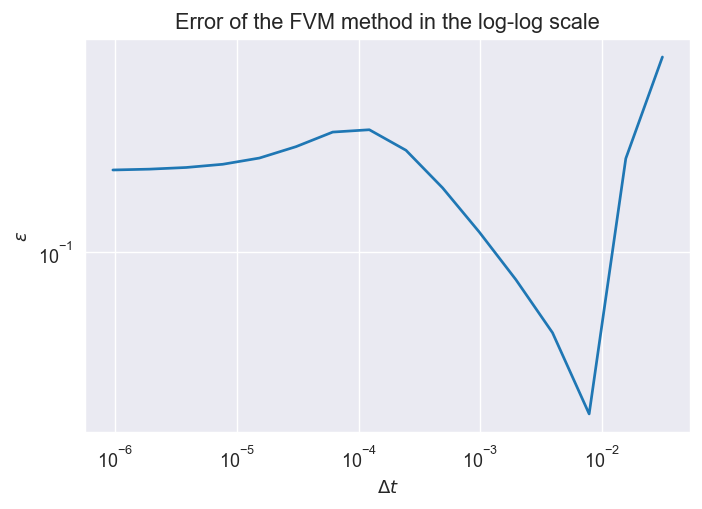

In [9]:
ps, errs = convergence_FVM(0.5**np.arange(5,21))

Based on the log-log plot of the error we can estimate the order of convergence.

|$h$|error|order|
|-|-|-|
|$2^{-5}$|0.3400|-|
|$2^{-6}$|0.1800|0.9175|
|$2^{-7}$|0.0364|2.3077|
|$2^{-8}$|0.0605|-0.7335|
|$2^{-9}$|0.0843|-0.4797|
|$2^{-10}$|0.1136|-0.4304|
|$2^{-11}$|0.1498|-0.3989|
|$2^{-12}$|0.1896|-0.3398|
|$2^{-13}$|0.2157|-0.1855|
|$2^{-14}$|0.2124|0.0211|
|$2^{-15}$|0.1939|0.1316|
|$2^{-16}$|0.1806|0.1030|
|$2^{-17}$|0.1737|0.0562|
|$2^{-18}$|0.1702|0.0292|
|$2^{-19}$|0.1684|0.0149|
|$2^{-20}$|0.1675|0.0076|

<h3 align="center">Stability</h3>

The stability of the method depends on the given set of parameters. For example, for spatial step $k=0.01$ and time step $h=2^{-4}$ numerical solution blows up and eventually we get NaN values. This may happen because the Courant-Friedrichs-Lewy conditiopn is not satisfied for this set of parameters.

> **Courant–Friedrichs–Lewy condition**
The discretization of a PDE satisfies the CFL condition if the numerical domain of dependence includes the physical domain of dependence. This condition requires that 
$$|C \frac{\Delta t}{\Delta x}| < 1.$$
If it is not satisfied then the numerical simulation produces incorrect results.

In [40]:
rho, xs, ts = FVM(method="Lax-Friedrich", problem="red_green_light", k=0.01, h=2**(-4))
rho_theoretical = theoretical_solution(problem="red_green_light", xs=xs, ts=ts)

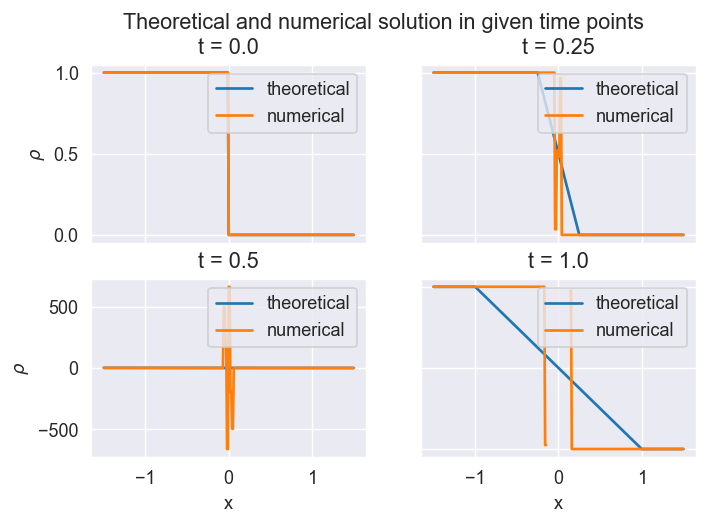

In [41]:
time_points = [0, 4, 8, 16]

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(xs, rho_theoretical[:,time_points[0]], label="theoretical")
axs[0, 0].plot(xs, rho[:,time_points[0]], label="numerical")
axs[0, 0].set_title(f't = {ts[time_points[0]]}')
axs[0, 0].legend()
axs[0, 1].plot(xs, rho_theoretical[:,time_points[1]], label="theoretical")
axs[0, 1].plot(xs, rho[:,time_points[1]], label="numerical")
axs[0, 1].set_title(f't = {ts[time_points[1]]}')
axs[0, 1].legend()
axs[1, 0].plot(xs, rho_theoretical[:,time_points[2]], label="theoretical")
axs[1, 0].plot(xs, rho[:,time_points[2]], label="numerical")
axs[1, 0].set_title(f't = {ts[time_points[2]]}')
axs[1, 0].legend()
axs[1, 1].plot(xs, rho_theoretical[:,time_points[3]], label="theoretical")
axs[1, 1].plot(xs, rho[:,time_points[3]], label="numerical")
axs[1, 1].set_title(f't = {ts[time_points[3]]}')
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='x', ylabel=r'$\rho$')

for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle("Theoretical and numerical solution in given time points")  
plt.show()

In [43]:
# animation here

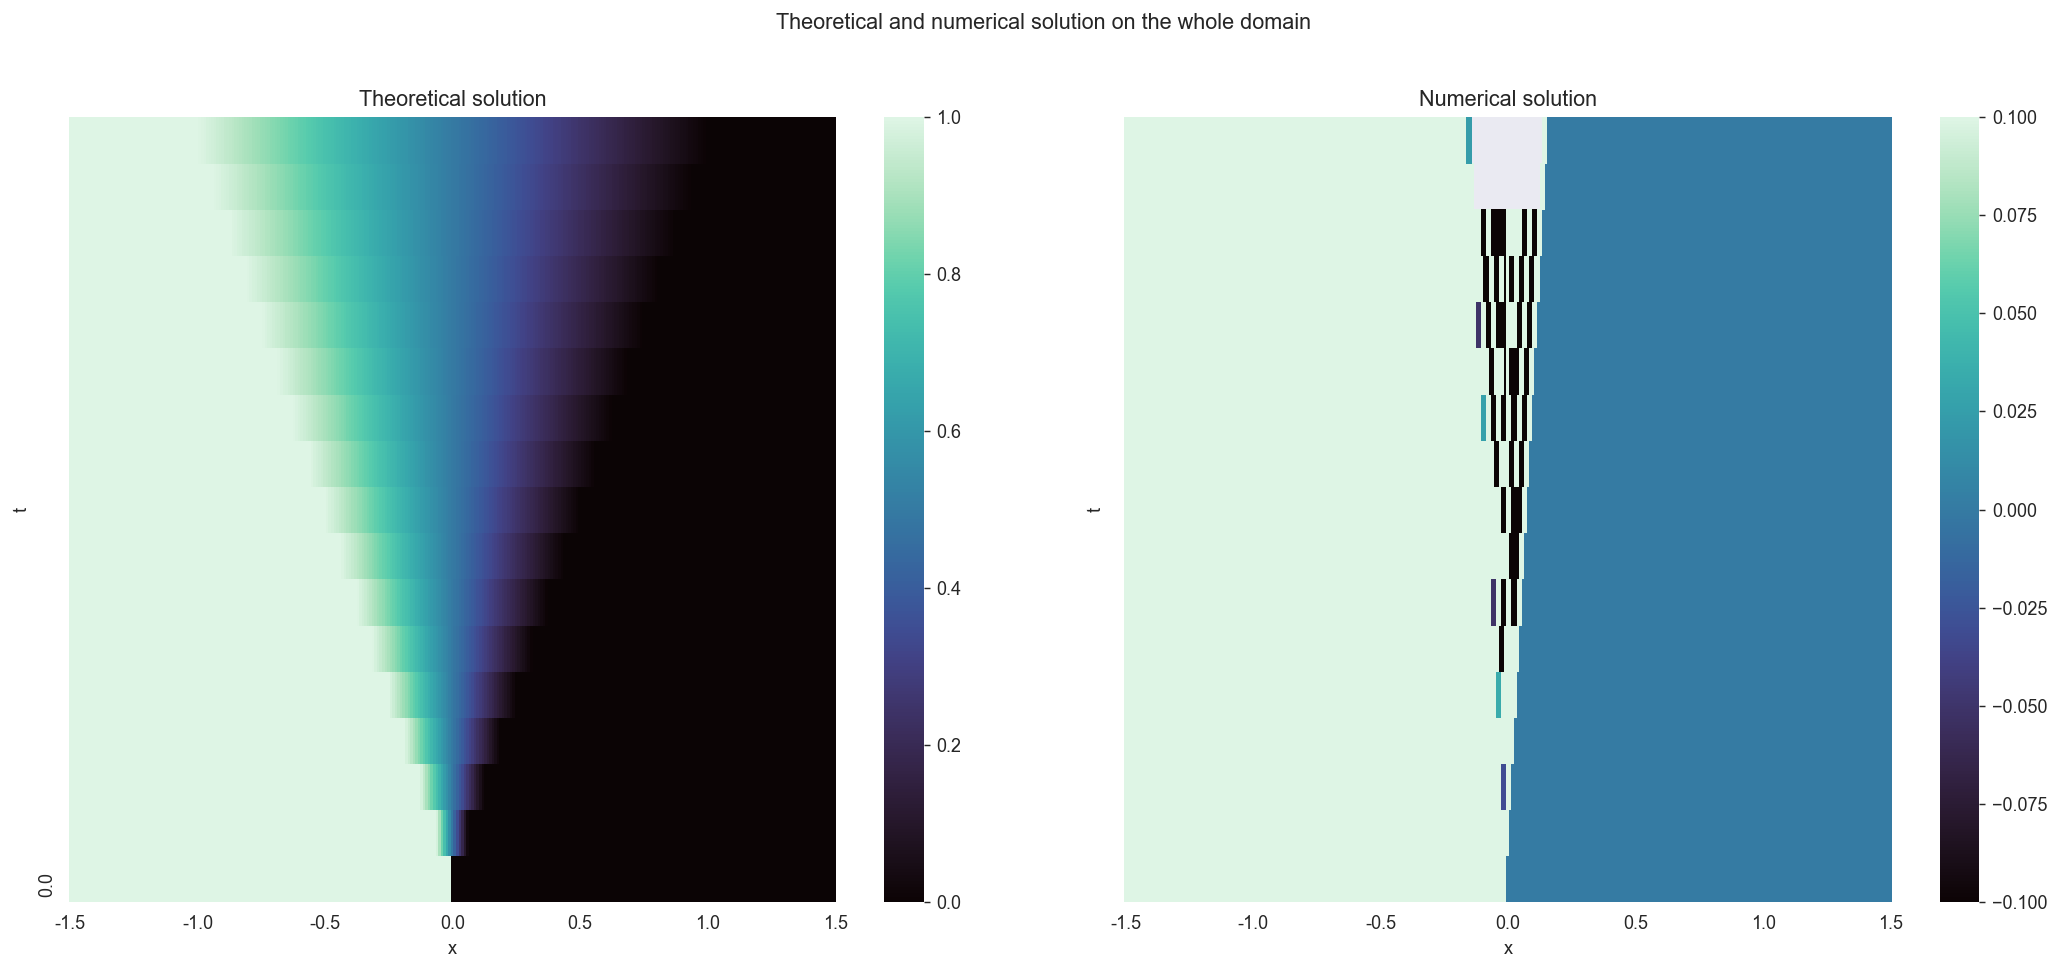

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
fig.subplots_adjust(wspace=0.1)

sns.heatmap(pd.DataFrame(rho_theoretical.T,  columns = np.round(xs,1), index = ts), cmap='mako', xticklabels=50, yticklabels=200, ax=ax1, cbar=True)
sns.heatmap(pd.DataFrame(rho.T, columns = np.round(xs,1), index = ts), cmap='mako', xticklabels=50, yticklabels=200, ax=ax2, cbar=True)

ax1.invert_yaxis()
ax1.set_title("Theoretical solution")
ax1.set(xlabel="x", ylabel="t")
ax2.invert_yaxis()
ax2.set_title("Numerical solution")
ax2.set(xlabel="x", ylabel="t")
ax2.yaxis.set_ticklabels([])

fig.suptitle("Theoretical and numerical solution on the whole domain")  
fig.subplots_adjust(wspace=0.1)
plt.show()

<h2 align="center">Conclusions</h2>

<h2 align="center">Resources</h2>

[1] Piccoli Benedetto, Tosin Andrea *Vehicular Traffic: A Review of Continuum Mathematical Models* (ARTYKUŁ Z MAILA)

[2] Płociniczak Łukasz *Numerical methods for differential equations* Lecture notes (WYKŁAD DO METOD NUMERYCZNYCH)